# Passo 2 | Análise Exploratória

### Bibliotecas

Alguns pacotes foram classes criadas para essa análise, como o 'plotting'

In [1]:
from simple_robot import feature_eng, api_get, api_post, get_result
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotting
import statsmodels.api as sm
from importlib import reload
import numpy as np
import operator
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 227

Verificação dos dados e descarte da variável 'const'

In [2]:
df = pd.read_parquet('data/eth.parquet')
df.drop('const', inplace = True, axis = 1)

### Verificação de Correlação entre as Features e 'Return'

In [3]:
df.corr()['target'].sort_values(ascending = False)

target              1.000000
volume              0.049262
number_of_trades    0.041031
volatility          0.036614
time               -0.007870
change             -0.011968
return             -0.012197
upper_band         -0.013156
ma_30              -0.013609
lag_1              -0.013885
ma_10              -0.013958
momentum           -0.014069
close              -0.014422
lower_band         -0.014622
rsi                -0.015691
lag_2              -0.028632
ratio_ma           -0.028753
signal             -0.032897
macd               -0.036478
Name: target, dtype: float64

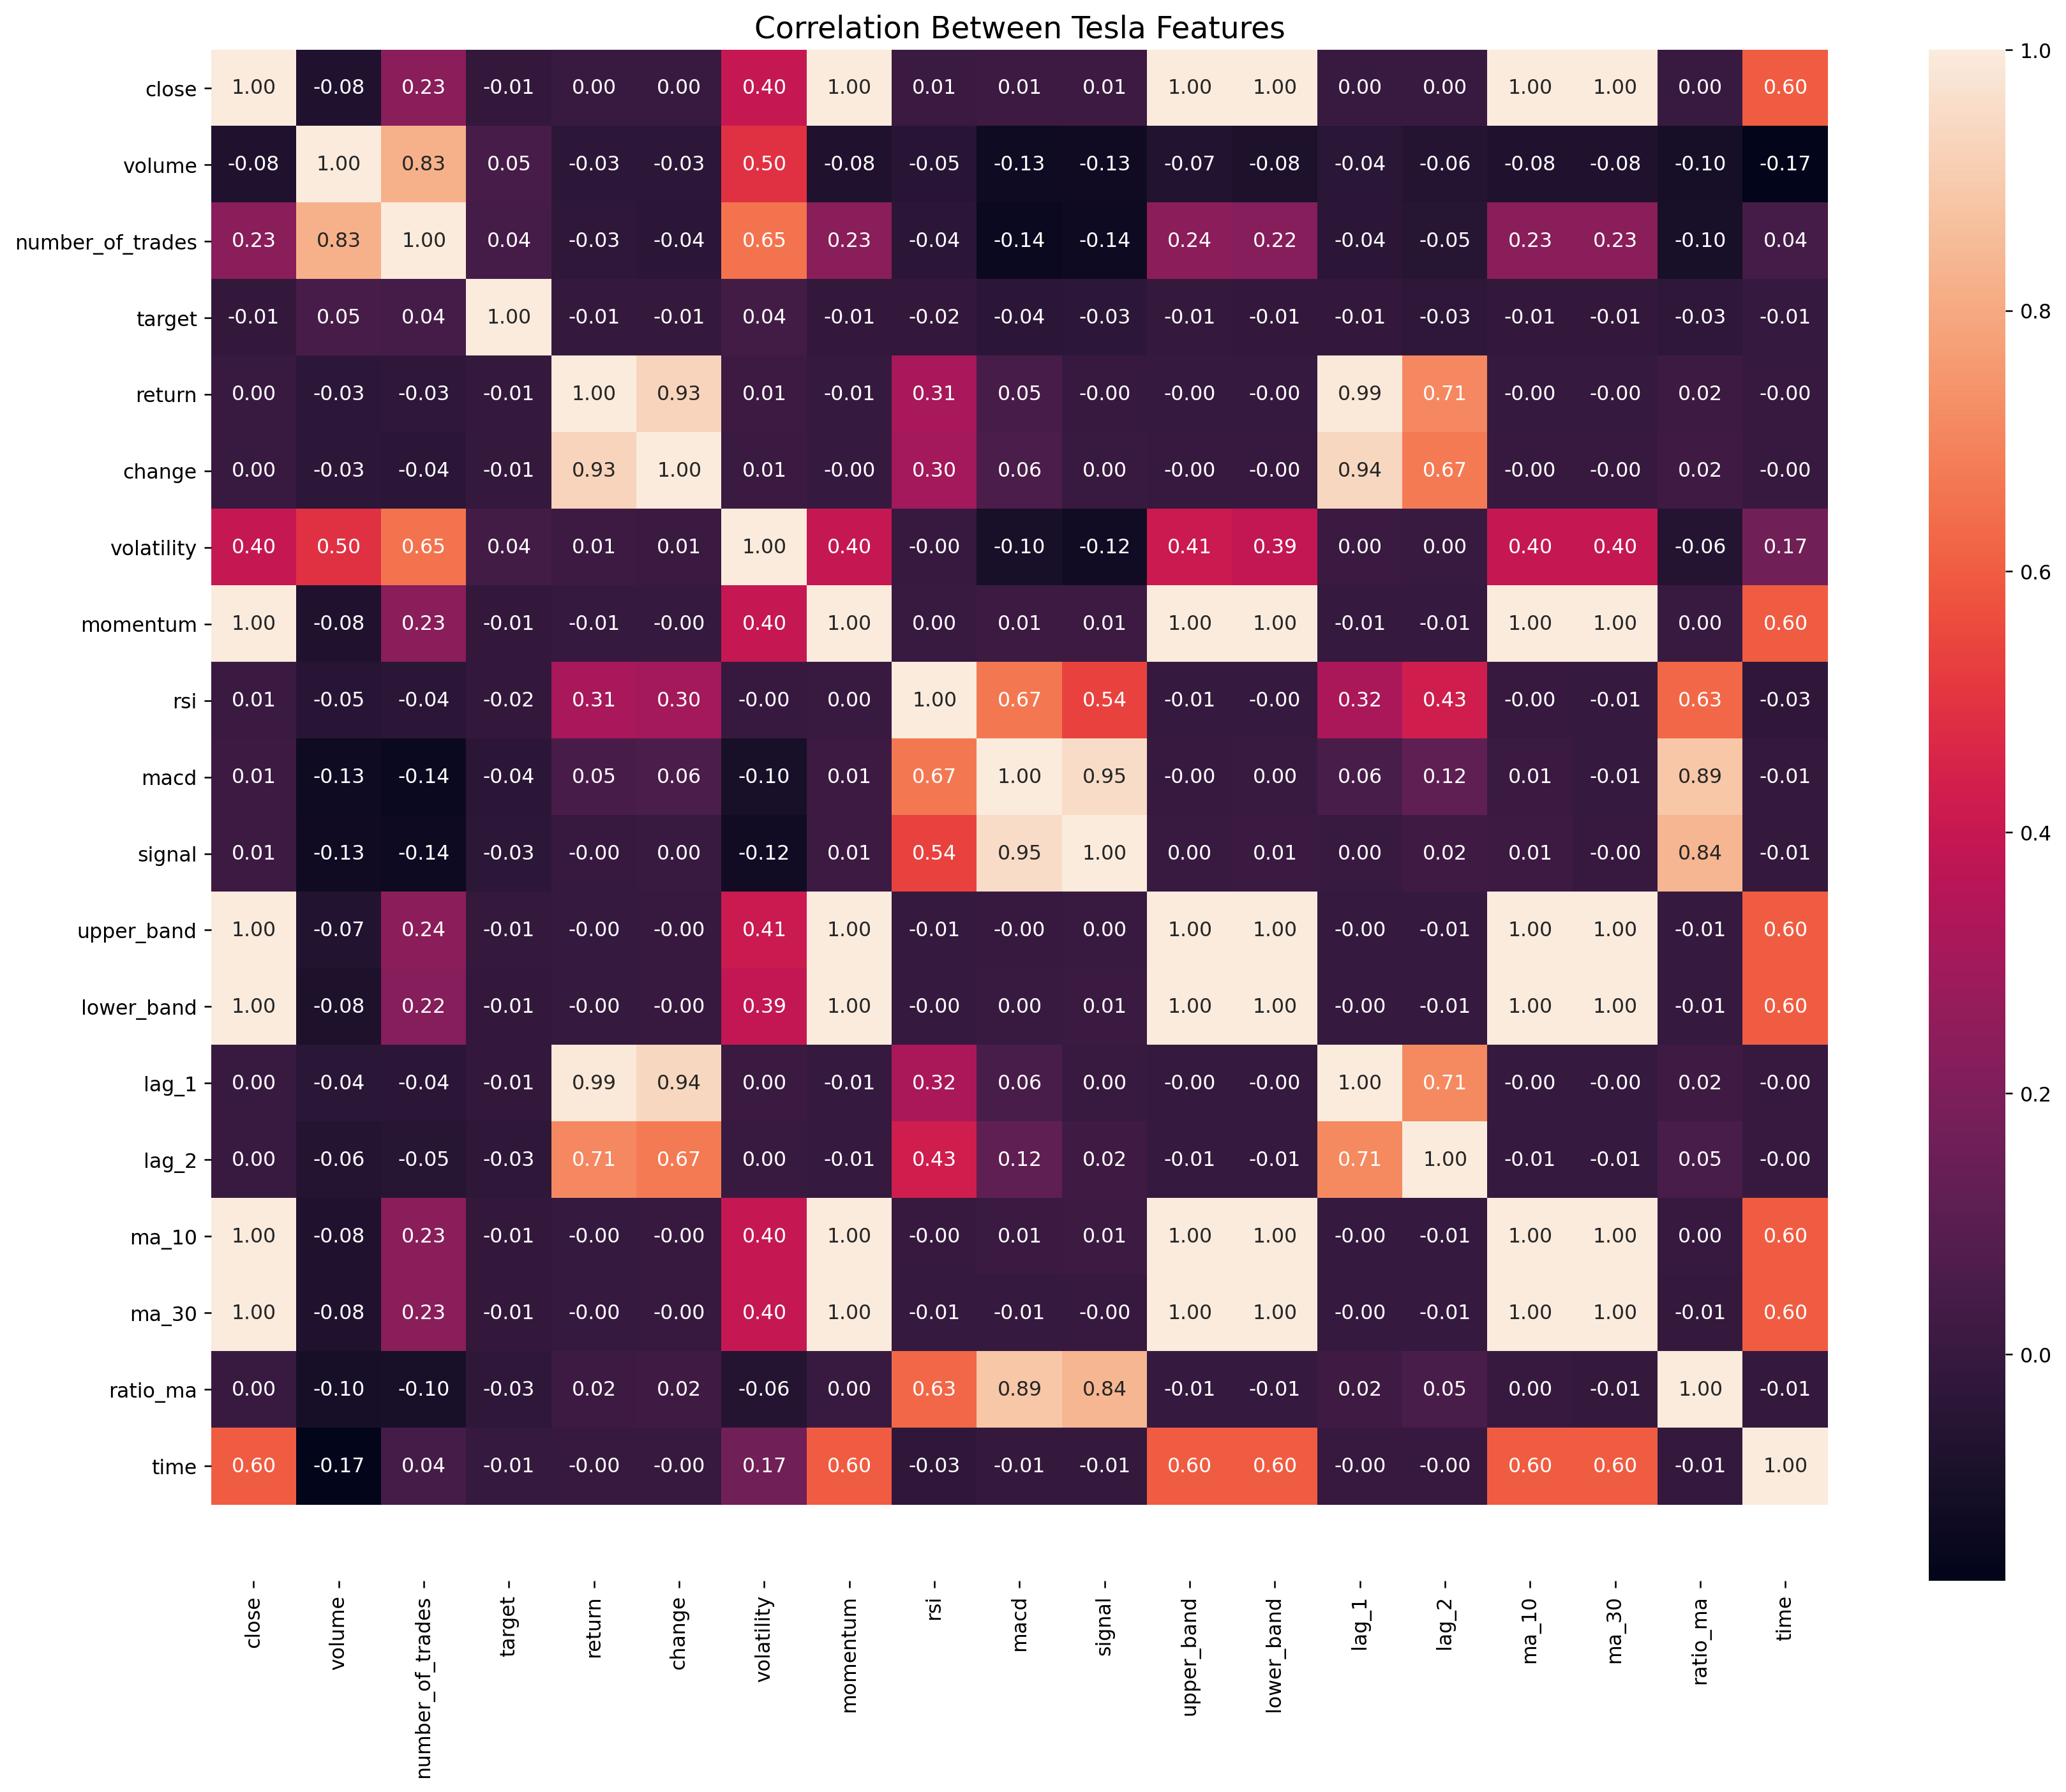

In [4]:
plt.rcParams['figure.dpi'] = 227
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.ylim(20, 0)
plt.title('Correlation Between Tesla Features', fontSize=15)
plt.show()

Conclusão: A premissa que possui a maior correlação com Target seria Volume.

### Indicadores de Verificação de Volatilidade

Ajuste da nomeclatura das features para se adequar ao desenvolvido nos pacotes importados.

In [5]:
df = df.rename(columns = {'close': 'Close',
                          'volume': 'Volume',
                          'rsi': 'RSI',
                          'upper_band': 'Upper_band',
                          'lower_band': 'Lower_band',
                          'macd': 'MACD',
                          'signal': 'Signal'}, inplace = False)
df.tail(5)

,Close,Volume,number_of_trades,target,return,change,volatility,momentum,RSI,MACD,Signal,Upper_band,Lower_band,lag_1,lag_2,ma_10,ma_30,ratio_ma,time
open_time,,,,,,,,,,,,,,,,,,,
2021-07-24 23:45:00,2179.860107,1300.048828,902,0.187301,0.000,0.330078,6.054524,2173.360107,71.037719,2.860866,2.521047,2180.555335,2167.867563,0.015142,0.069730,2176.043042,2171.665348,1.002016,1080676
2021-07-24 23:46:00,2182.830078,331.235748,691,0.071921,0.001,2.969971,6.421120,2175.340088,75.556492,3.183784,2.653594,2181.795689,2167.937686,0.136061,0.151182,2176.889038,2172.327018,1.002100,1080677
2021-07-24 23:47:00,2183.770020,1082.394287,1633,0.038328,0.000,0.939941,6.784248,2176.530029,76.790686,3.475480,2.817971,2182.843086,2168.386476,0.043042,0.179044,2177.910034,2172.953019,1.002281,1080678
2021-07-24 23:48:00,2181.830078,358.079468,698,0.149274,-0.001,-1.939941,6.939893,2176.860107,69.042358,3.509658,2.956309,2183.486715,2168.806672,-0.088913,-0.045833,2178.670044,2173.527686,1.002366,1080679
2021-07-24 23:49:00,2183.500000,205.055878,498,0.078406,0.001,1.669922,7.164565,2179.830078,71.690403,3.629652,3.090977,2184.330156,2169.172751,0.076479,-0.012366,2179.573047,2174.077686,1.002528,1080680


#### Volume

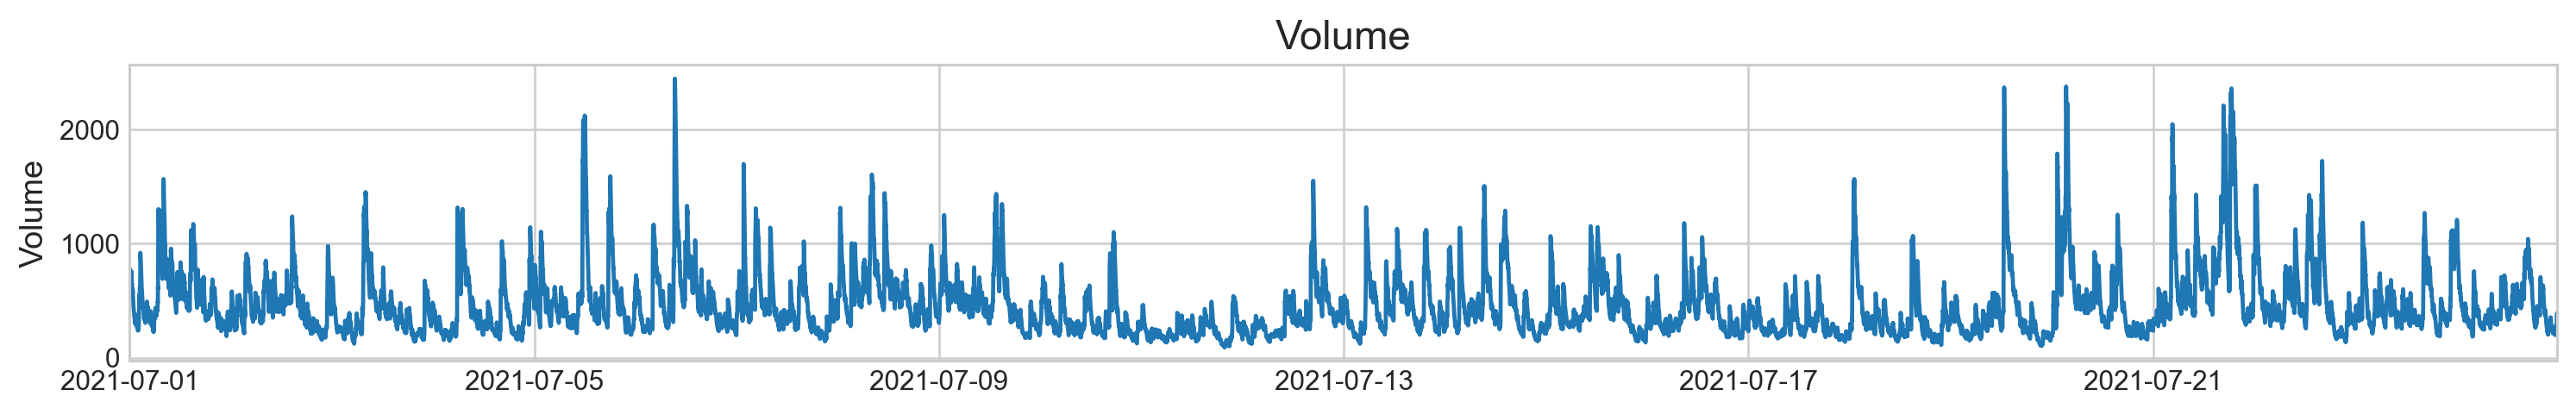

In [6]:
plotting.volume(df.loc['2021-07-01 00:00:00':'2021-07-24 23:49:00'])

#### RSI

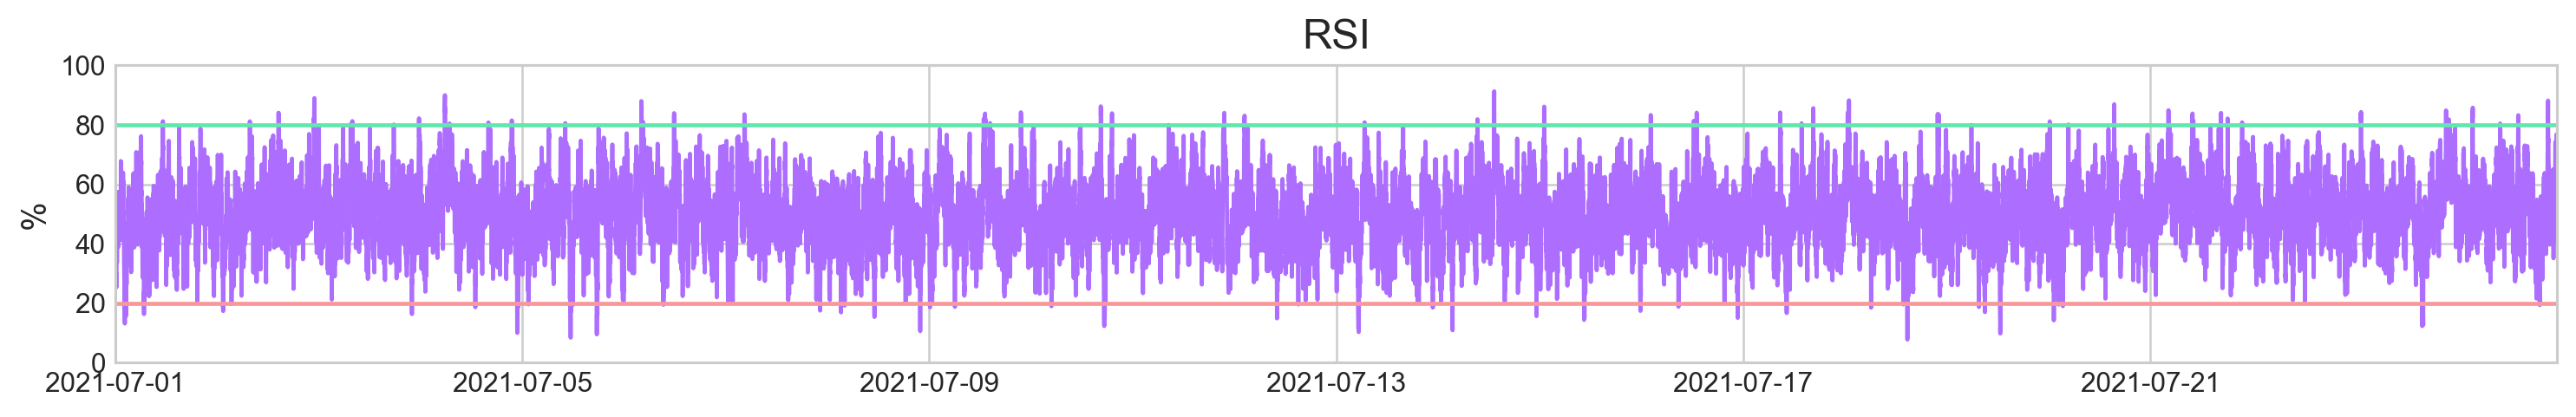

In [7]:
plotting.rsi(df.loc['2021-07-01 00:00:00':'2021-07-24 23:49:00'])

- Demonstra uma certa estabilização em 60% com flutuações próximas a 80%, sendo esse comportamento uma tendência de aumento;
- Esse é um indicador que mostra o quanto um movimento de alta ou baixa ainda têm "fôlego" antes de uma reversão. A análise desse indicador está relacionada com as noções de overbought (sobrecompra) e oversold (sobrevenda) e as divergências em relação a ação de preço (price action).

#### Análise de Bollinger (Bollinger Bands)

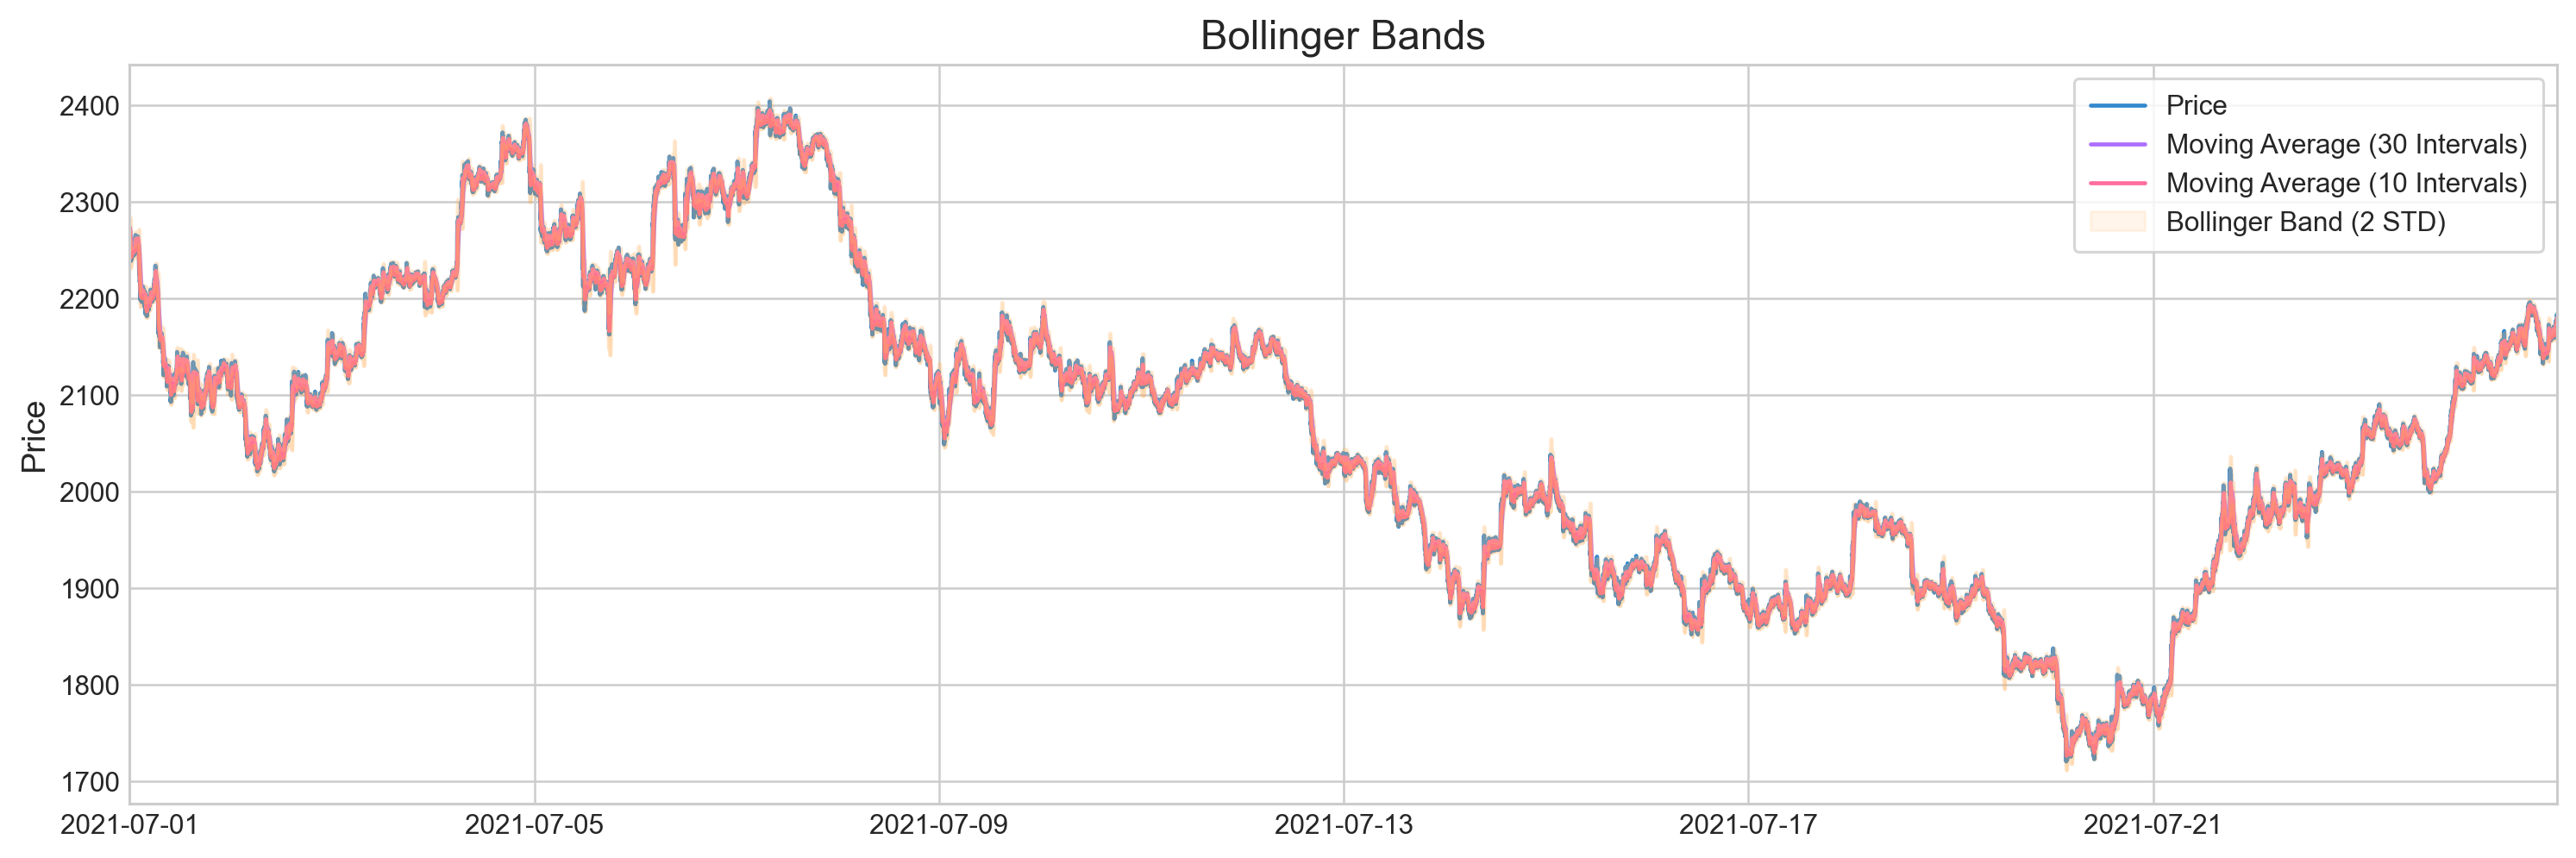

In [8]:
plotting.bollinger_bands(df.loc['2021-07-01 00:00:00':'2021-07-24 23:49:00'])

- Constantemente a linha de preço supera os limites de volatilidade esperados por meio de dois desvios padrões;
- As bandas servem para ajudar a identificar a relação risco-retorno do investimento, a fim de avaliar os limites de volatilidade esperados para o ativo em questão e a capacidade dos preços atingirem o limite de volatilidade esperado.

#### MACD (Moving Average Convergence / Divergence)

<Figure size 3632x1362 with 0 Axes>

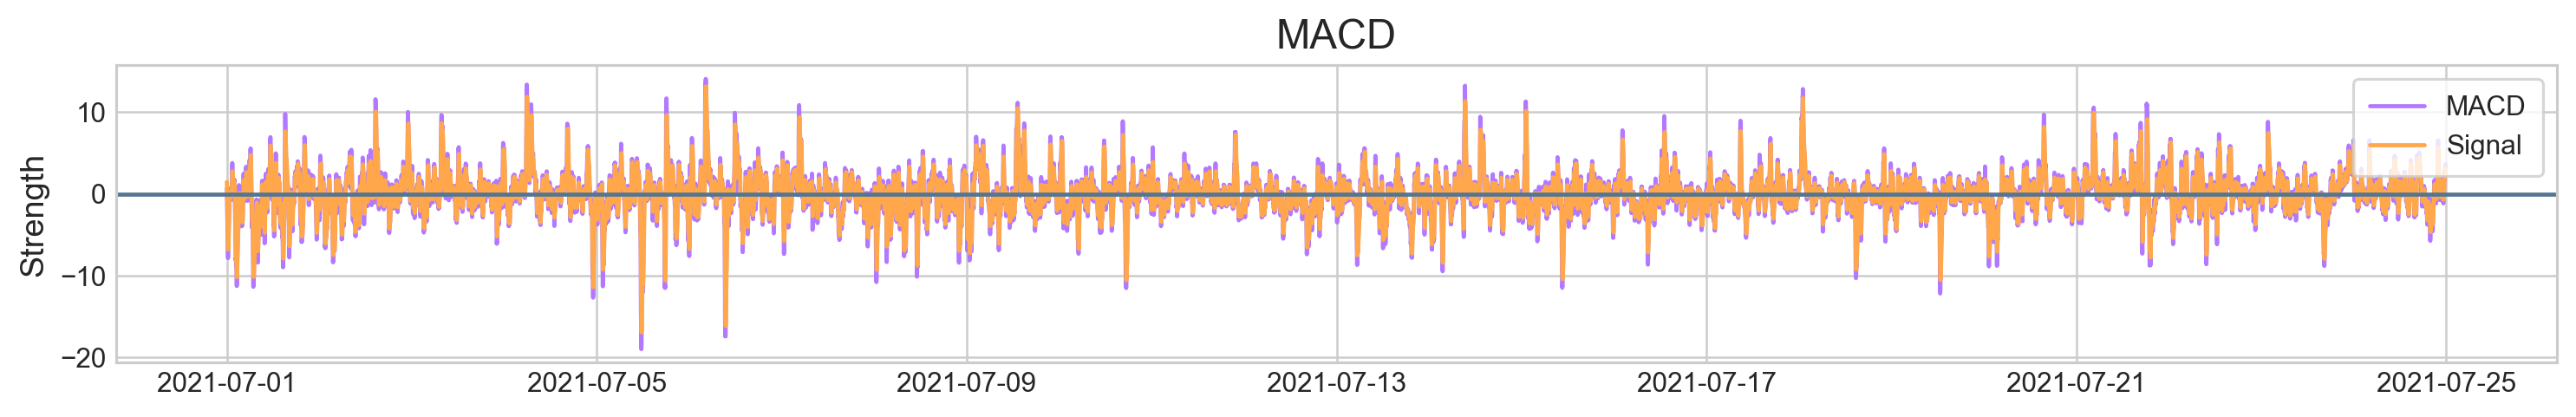

In [9]:
plt.figure(figsize=(16,6))
plotting.macd(df.loc['2021-07-01 00:00:00':'2021-07-24 23:49:00'])

- Há uma grande tendência de aumento como podemos observar na curva roxa sempre ultrapassando o "signal";
- Esse indicador é um oscilador que analisa a convergência e divergência entre duas médias móveis para tentar identificar tendências de preço.

### Verificação de Normalidade

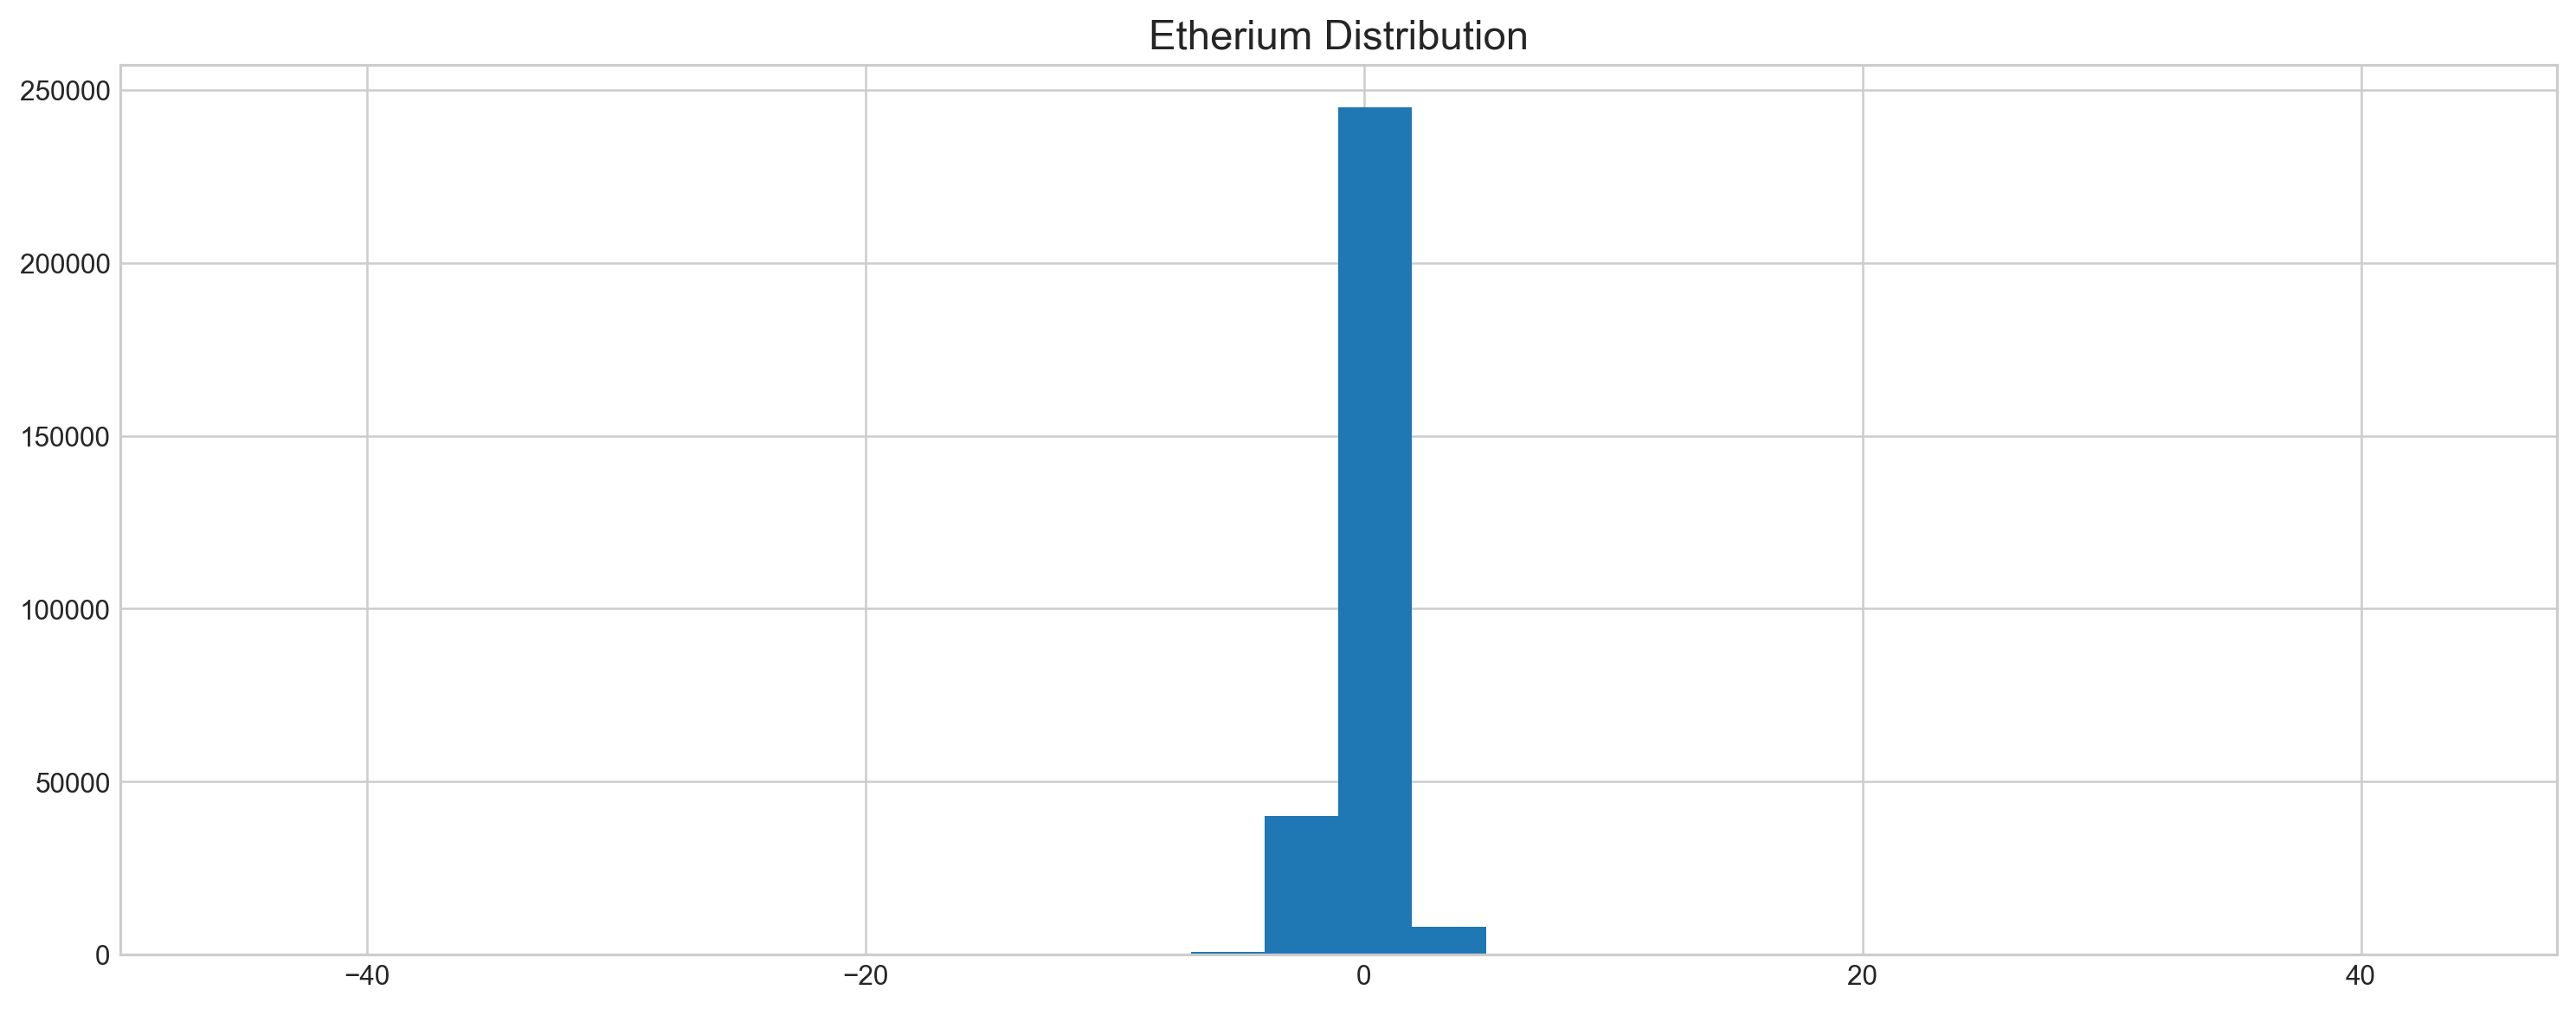

In [10]:
plt.figure(figsize=(16,6))
z = lambda x: (x - x.mean()) / x.std()

plt.hist(z(df[['return']]), bins=30)
plt.title('Etherium Distribution', fontSize=15)
plt.show()

<Figure size 3632x1362 with 0 Axes>

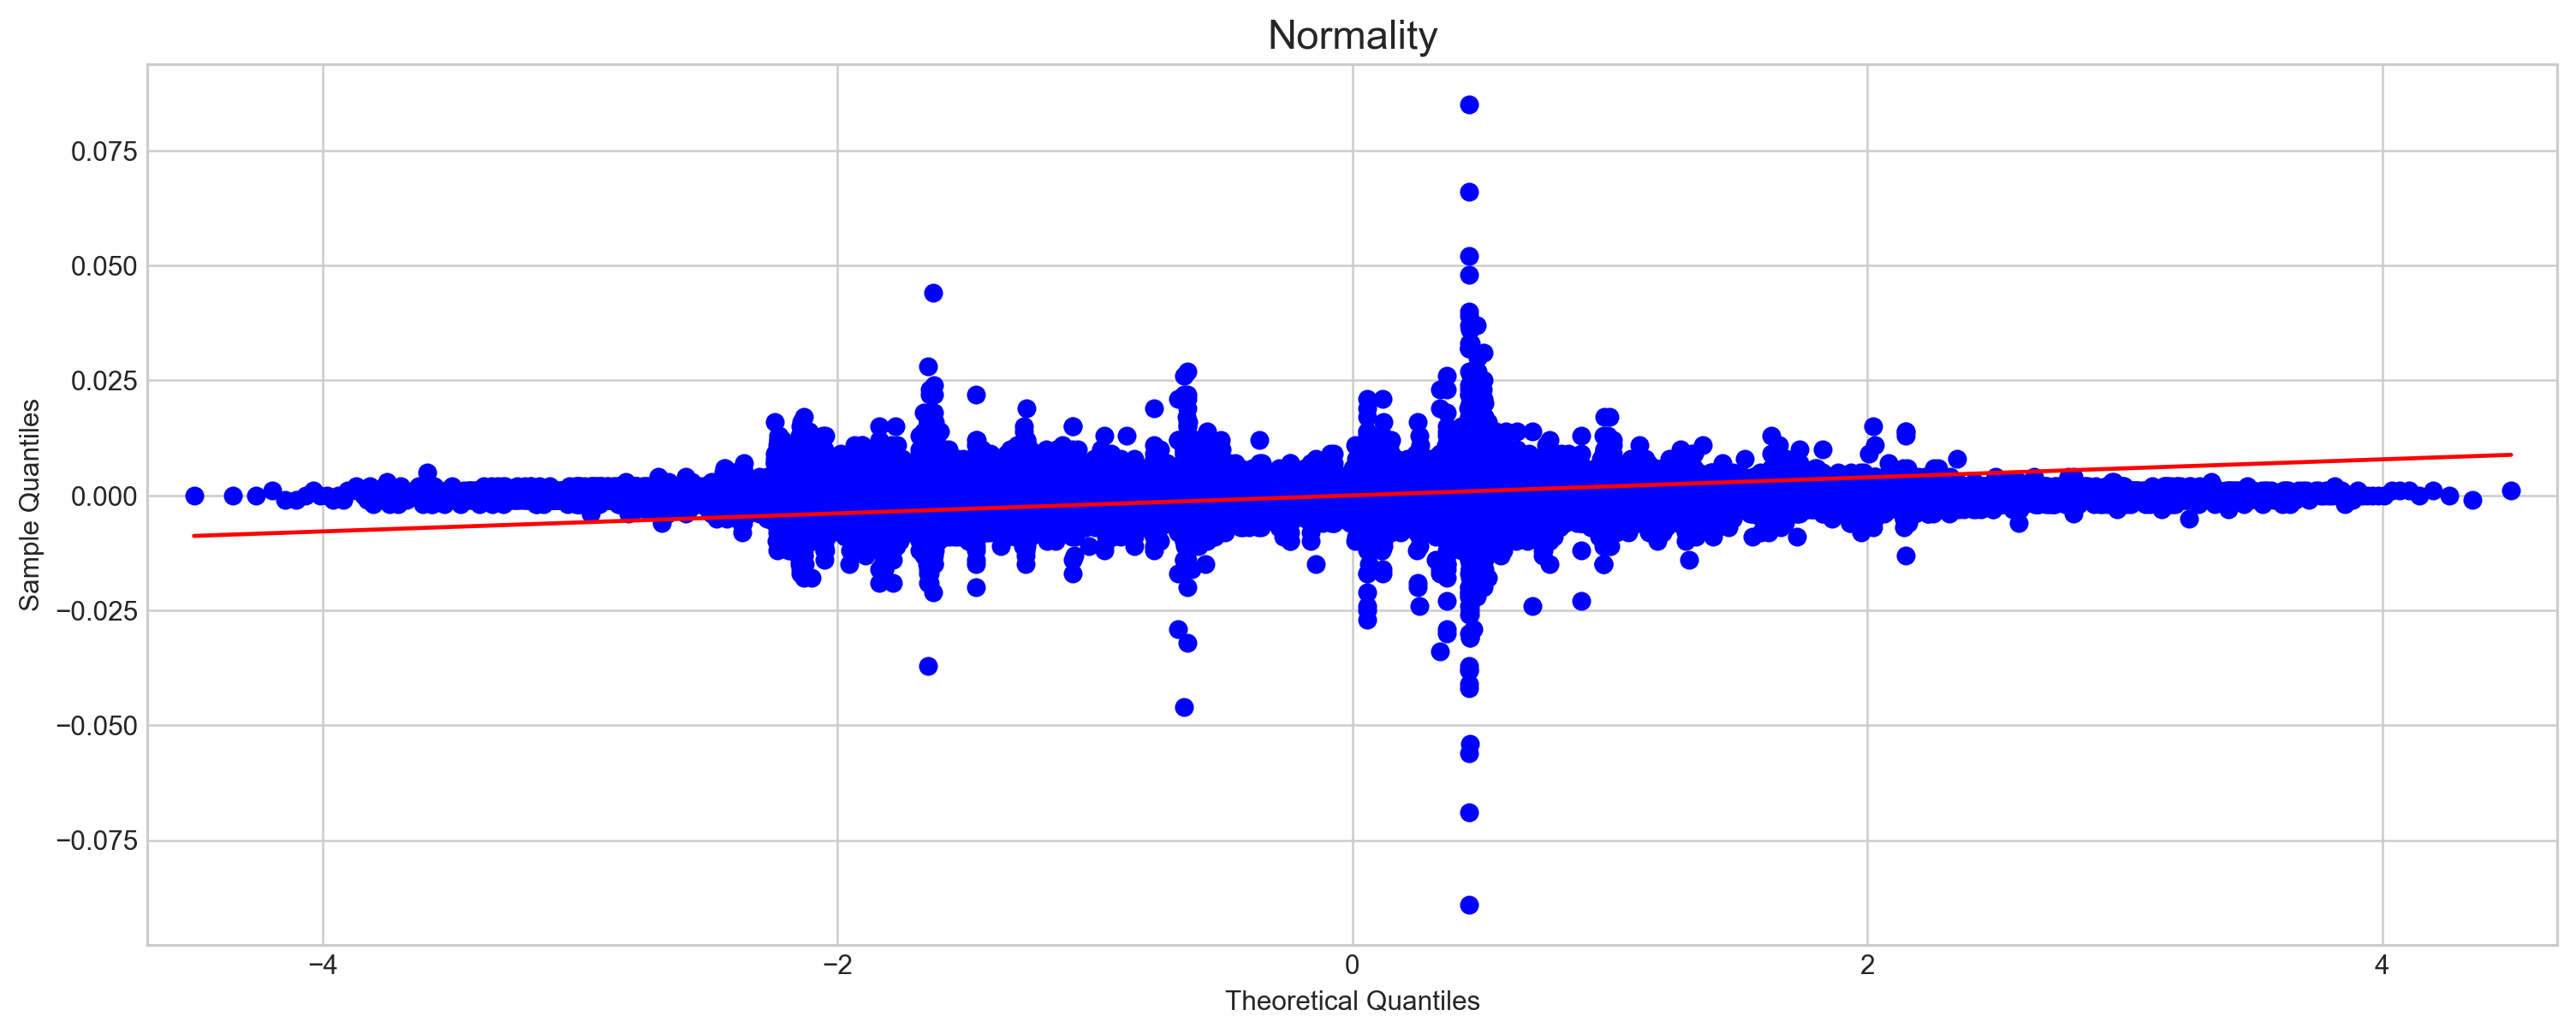

In [12]:
plt.figure(figsize=(16,6))
plt.rcParams['figure.dpi'] = 227
sm.qqplot(df[['return']], line='s', scale=1)
plt.rcParams['figure.figsize'] = [16.0, 6.0]
plt.title('Normality', fontSize=15)
plt.show()